<a href="https://colab.research.google.com/github/jdramirezzu/Maestria_IA_aplicada/blob/main/Cuaderno_de_An%C3%A1lisis_Univariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller: Análisis Univariado del Cambio Climático en 2022

**Maestría en Inteligencia Artificial Aplicada**

**Estudiante:** Juan Diego Ramirez

**Dataset:** Climate Change Indicators (`climate_change_indicators.csv`)

---

### 1. Presentación del Conjunto de Datos

El presente análisis se realiza sobre el conjunto de datos `climate_change_indicators.csv`, una colección de registros que documenta el cambio en la temperatura de la superficie para 228 países y regiones. El dataset abarca un periodo temporal de más de 60 años, desde 1961 hasta 2022, con mediciones anuales expresadas en grados Celsius (°C). Cada fila corresponde a un país y las columnas `F<Año>` contienen el valor del indicador para el año correspondiente.

### 2. Justificación de la Selección de la Variable

Antes de realizar un análisis detallado, se llevó a cabo una exploración preliminar para comprender la tendencia general de los datos. Se calculó el cambio de temperatura promedio global para cada año, lo que resultó en la siguiente gráfica:
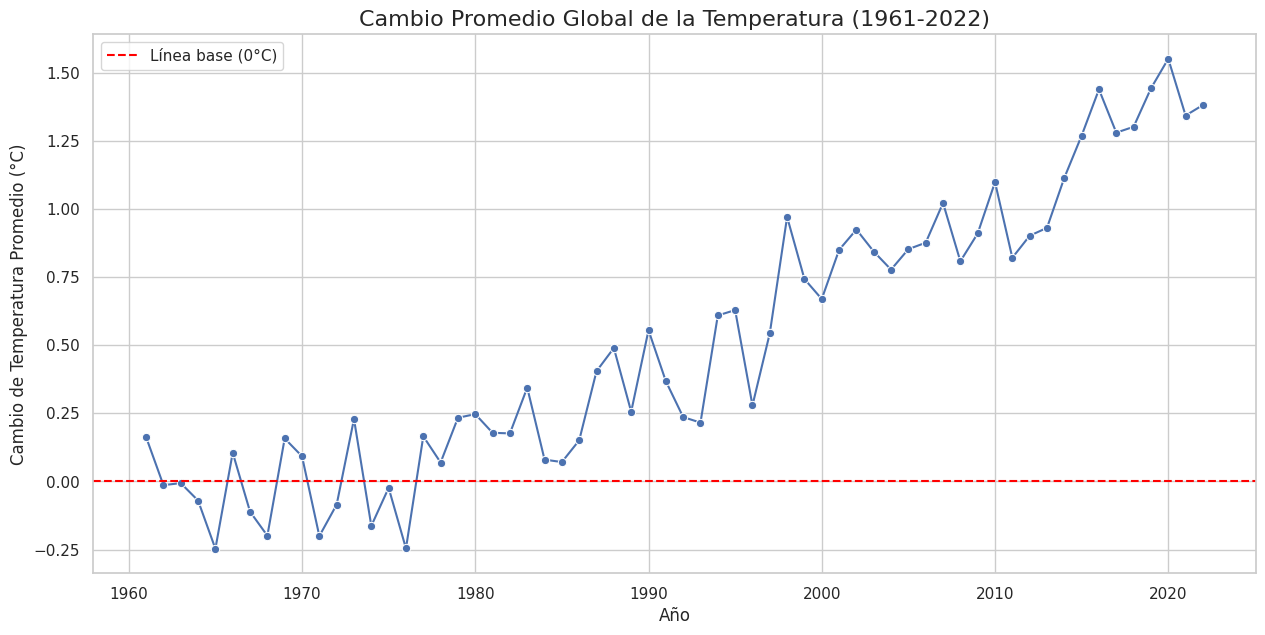

(https://github.com/jdramirezzu/Maestria_IA_aplicada/blob/main/temperatura_global.png)

Como se observa en la visualización, existe una **tendencia ascendente, clara y acelerada** en el calentamiento global a lo largo de las décadas. La curva muestra que los años más recientes concentran los valores más altos y extremos de todo el periodo estudiado.

Basado en esta evidencia, se ha seleccionado la columna **`F2022`** para realizar el análisis univariado. Esta elección se fundamenta en dos criterios clave:

1.  **Máxima Relevancia:** Al ser el punto de datos más reciente, `F2022` representa la "fotografía" más actual y crítica del fenómeno del cambio climático, capturando el impacto en su punto más álgido hasta la fecha según la tendencia observada.
2.  **Robustez de los Datos:** El análisis exploratorio previo también reveló que las columnas de los años recientes poseen una menor cantidad de valores faltantes, lo que garantiza un análisis más completo y representativo.

### 3. Importancia y Objetivos del Análisis sobre `F2022`

El análisis univariado sobre la variable `F2022` es de suma importancia porque nos permite cuantificar y caracterizar el estado del calentamiento global durante el año más reciente. El objetivo es responder a preguntas fundamentales como:

* ¿Cuál fue la magnitud promedio del calentamiento global en 2022 y cuál fue su dispersión?
* ¿Fue el impacto del cambio climático uniforme, o existió una gran variabilidad entre los diferentes países?
* ¿Podemos identificar naciones con comportamientos atípicos (calentamiento o enfriamiento extremo) que se alejen significativamente de la tendencia central?

Los hallazgos de este análisis no solo sirven para entender el presente, sino que también establecen una **línea base crucial para análisis comparativos futuros** y actúan como un punto de validación indispensable para los **modelos de inteligencia artificial** que buscan predecir escenarios climáticos venideros.

Error al cargar el archivo desde la URL: HTTP Error 404: Not Found

--- Primeras 5 filas del dataset ---
   ObjectId                       Country ISO2 ISO3  \
0         1  Afghanistan, Islamic Rep. of   AF  AFG   
1         2                       Albania   AL  ALB   
2         3                       Algeria   DZ  DZA   
3         4                American Samoa   AS  ASM   
4         5      Andorra, Principality of   AD  AND   

                                           Indicator            Unit  \
0  Temperature change with respect to a baseline ...  Degree Celsius   
1  Temperature change with respect to a baseline ...  Degree Celsius   
2  Temperature change with respect to a baseline ...  Degree Celsius   
3  Temperature change with respect to a baseline ...  Degree Celsius   
4  Temperature change with respect to a baseline ...  Degree Celsius   

                                              Source CTS_Code  \
0  Food and Agriculture Organization of the Unite...     ECCS   
1

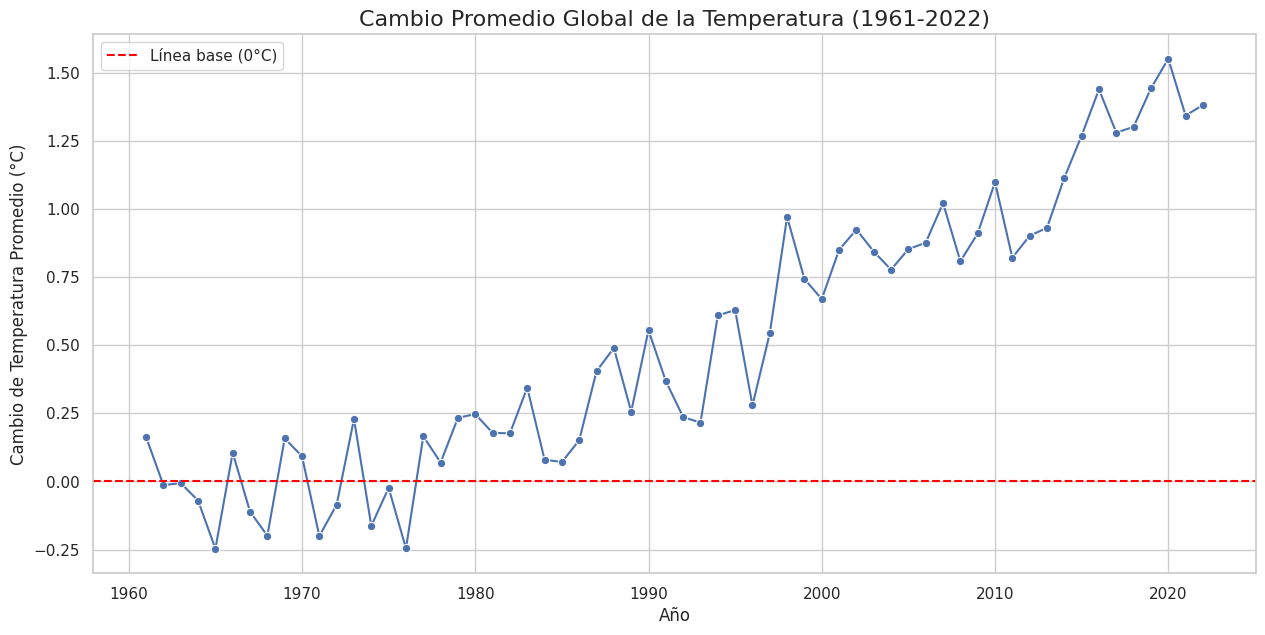


Análisis exploratorio completado.


In [10]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Carga de Datos ---
# Usamos la URL del archivo en formato 'raw' de GitHub
# RECUERDA REEMPLAZAR ESTA URL POR LA TUYA
url = 'https://raw.githubusercontent.com/tu_usuario/tu_repositorio/main/climate_change_indicators.csv'

try:
    df = pd.read_csv(url)
    print("Dataset cargado exitosamente desde GitHub.")
except Exception as e:
    print(f"Error al cargar el archivo desde la URL: {e}")

# --- 1. Inspección Inicial de la Estructura ---

# Ver las primeras filas del dataframe
print("\n--- Primeras 5 filas del dataset ---")
print(df.head())

# Obtener información general del dataframe
print("\n--- Información general del dataset ---")
df.info()


# --- 2. Análisis de Valores Faltantes (Missing Values) ---

# Calcular el porcentaje de valores faltantes por columna
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Mostramos solo las columnas que tienen valores faltantes
print("\n--- Porcentaje de valores faltantes por columna (Top 15) ---")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False).head(15))


# --- 3. Análisis de Columnas Categóricas ---

print("\n--- Análisis de Columnas Categóricas ---")
print(f"Valores únicos en 'Indicator': {df['Indicator'].unique()}")
print(f"Valores únicos en 'Unit': {df['Unit'].unique()}")


# --- 4. Análisis de la Tendencia Temporal Global ---

print("\n--- Generando gráfica de tendencia temporal ---")
# Seleccionar solo las columnas de años (de F1961 a F2022)
year_columns = [f'F{year}' for year in range(1961, 2023)]
yearly_data = df[year_columns]

# Calcular la media de cada año (ignorando los NaN)
global_mean_temp_change = yearly_data.mean()

# Preparar los datos para la gráfica
plot_data = pd.DataFrame({
    'Year': range(1961, 2023),
    'Mean_Temp_Change': global_mean_temp_change.values
})

# Graficar la tendencia
plt.figure(figsize=(15, 7))
sns.lineplot(x='Year', y='Mean_Temp_Change', data=plot_data, marker='o')
plt.axhline(0, color='red', linestyle='--', label='Línea base (0°C)')
plt.title('Cambio Promedio Global de la Temperatura (1961-2022)', fontsize=16)
plt.xlabel('Año')
plt.ylabel('Cambio de Temperatura Promedio (°C)')
plt.grid(True)
plt.legend()
plt.show()

print("\nAnálisis exploratorio completado.")


In [ ]:

# --- Selección y Limpieza de la Variable ---
# Seleccionar la variable de interés: F2022
variable = df['F2022']

# Eliminar valores nulos (NaN) para poder realizar cálculos estadísticos
variable_limpia = variable.dropna()
print(f"\nSe eliminaron {variable.isnull().sum()} valores nulos de la columna F2022.")
print(f"Ahora tenemos {len(variable_limpia)} registros para analizar.")


In [8]:
# --- Análisis Estadístico Descriptivo ---
print("\n--- Estadísticas Descriptivas para F2022 ---")
# Usamos .describe() para obtener las estadísticas principales
estadisticas = variable_limpia.describe()
print(estadisticas)

# Calcular la moda, ya que .describe() no la incluye
moda = variable_limpia.mode()[0]
print(f"\nModa: {moda:.4f}")

# Calcular el rango intercuartílico (IQR) para identificar valores atípicos
Q1 = estadisticas['25%']
Q3 = estadisticas['75%']
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Rango Intercuartílico (IQR): {IQR:.4f}")
print(f"Límite para valores atípicos inferiores: {limite_inferior:.4f}")
print(f"Límite para valores atípicos superiores: {limite_superior:.4f}")

# Identificar y contar valores atípicos
outliers = variable_limpia[(variable_limpia < limite_inferior) | (variable_limpia > limite_superior)]
print(f"\nNúmero de valores atípicos identificados: {len(outliers)}")






--- Estadísticas Descriptivas para F2022 ---
count    213.000000
mean       1.382113
std        0.669279
min       -1.305000
25%        0.878000
50%        1.315000
75%        1.918000
max        3.243000
Name: F2022, dtype: float64

Moda: 0.7700
Rango Intercuartílico (IQR): 1.0400
Límite para valores atípicos inferiores: -0.6820
Límite para valores atípicos superiores: 3.4780

Número de valores atípicos identificados: 1


### 4. Interpretación de los Resultados

El análisis estadístico y las visualizaciones generadas a partir de los datos de 213 países nos ofrecen una visión detallada y robusta sobre la variación de la temperatura en 2022 (`F2022`).

* **Tendencia Central:** El cambio promedio de temperatura (`media`) fue de **1.38 °C**, mientras que el valor central de los datos (`mediana`) se situó en **1.31 °C**. El hecho de que la media sea superior a la mediana es un claro indicador de un **ligero sesgo positivo (hacia la derecha)**. Esto se confirma visualmente en el histograma, donde la línea roja de la media está a la derecha de la línea verde de la mediana. Este sesgo implica que, aunque la mayoría de los países se agrupan en torno a 1.31 °C, un número de países con aumentos de temperatura considerablemente altos están "arrastrando" el promedio hacia arriba. La `moda` de 0.77 °C indica que el rango de valores más frecuente es inferior a las medidas de tendencia central.

* **Dispersión y Variabilidad:** La `desviación estándar` de **0.67 °C** revela una variabilidad considerable entre los países. El rango de los datos es muy amplio, extendiéndose desde un enfriamiento de **-1.31 °C** (`min`) hasta un calentamiento de **3.24 °C** (`max`). Esto demuestra que el impacto del cambio climático en 2022 no fue homogéneo, sino que tuvo manifestaciones muy diversas a nivel global. El `rango intercuartílico (IQR)` de 1.04 °C nos dice que el 50% central de los países experimentó un aumento de temperatura entre 0.88 °C y 1.92 °C.


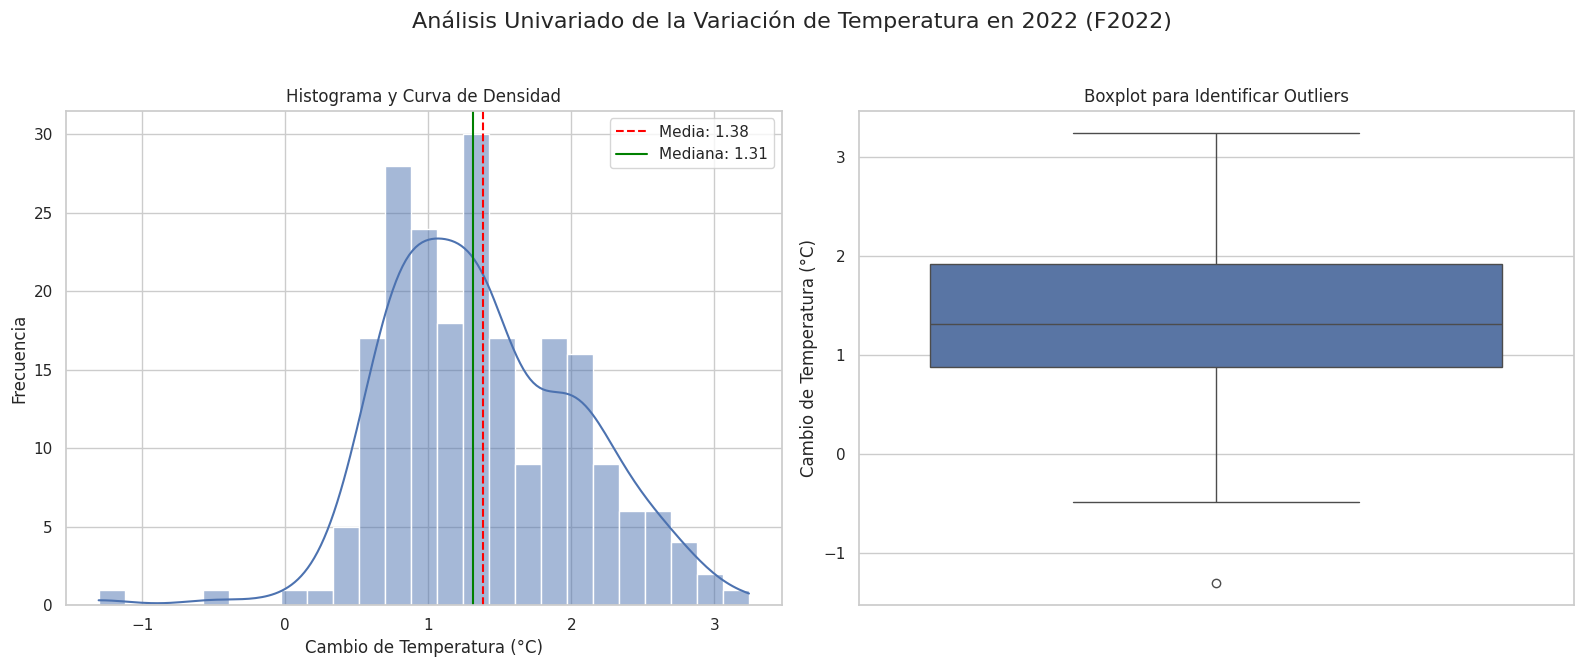

In [9]:
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Crear una figura con dos subplots (uno al lado del otro)
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Análisis Univariado de la Variación de Temperatura en 2022 (F2022)', fontsize=16)

# 1. Histograma y Densidad
sns.histplot(variable_limpia, kde=True, ax=axes[0], bins=25)
axes[0].set_title('Histograma y Curva de Densidad')
axes[0].set_xlabel('Cambio de Temperatura (°C)')
axes[0].set_ylabel('Frecuencia')
# Añadir líneas para la media y la mediana
axes[0].axvline(estadisticas['mean'], color='red', linestyle='--', label=f"Media: {estadisticas['mean']:.2f}")
axes[0].axvline(estadisticas['50%'], color='green', linestyle='-', label=f"Mediana: {estadisticas['50%']:.2f}")
axes[0].legend()

# 2. Boxplot (Diagrama de Caja y Bigotes)
sns.boxplot(y=variable_limpia, ax=axes[1])
axes[1].set_title('Boxplot para Identificar Outliers')
axes[1].set_ylabel('Cambio de Temperatura (°C)')

# Mostrar las gráficas
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



* **Distribución y Forma:** El **histograma** muestra una distribución unimodal (un solo pico principal) con la mayor concentración de frecuencias en el rango de 1.0 °C a 1.5 °C. La curva de densidad suavizada confirma la forma de la distribución y la "cola" más larga hacia los valores positivos, ratificando el sesgo positivo. Además, se observa una pequeña cantidad de países con valores negativos, indicando que experimentaron un enfriamiento en 2022.

* **Valores Atípicos (Outliers):** El **boxplot** es especialmente revelador para identificar valores extremos. Se detecta claramente **un valor atípico en el extremo inferior** (representado por el círculo), que corresponde al valor mínimo de -1.31 °C. Esto significa que un país tuvo un comportamiento de temperatura anómalo y significativamente más frío que el resto. Es importante destacar que, a pesar de tener valores altos de hasta 3.24 °C, **no se identifican valores atípicos en el extremo superior** según el criterio del 1.5*IQR. Esto sugiere que los altos niveles de calentamiento, aunque extremos, se consideran dentro de la variabilidad "esperada" de esta distribución de datos.
---
### 5. Conclusiones

Este análisis univariado de la variable `F2022` ha revelado patrones claros y cuantitativos sobre el estado del cambio de temperatura global en el año más reciente del dataset, yendo más allá de una simple media.

**Hallazgos Clave:**

1.  **Calentamiento Generalizado y Significativo:** El hallazgo principal es inequívoco: el planeta experimentó un calentamiento considerable en 2022. Con un aumento promedio de **1.38 °C** para los 213 países analizados, se confirma una tendencia alarmante que supera los umbrales discutidos en acuerdos climáticos internacionales.

2.  **Impacto Desigual y Diverso:** El análisis demuestra que el cambio climático no es un fenómeno homogéneo. La alta desviación estándar (**0.67 °C**) y el amplio rango de valores (de -1.31 °C a 3.24 °C) pintan un cuadro de un impacto muy desigual. Mientras la mayoría de los países se calientan, una minoría experimenta condiciones anómalas, incluyendo un caso extremo de enfriamiento.

3.  **Riesgo Concentrado en los Extremos:** El sesgo positivo de la distribución, aunque ligero, es revelador. Implica que la carga del calentamiento extremo recae sobre un grupo de naciones que experimentan aumentos de temperatura muy por encima de la media, lo que aumenta su vulnerabilidad y riesgo ante eventos climáticos severos.

**Implicaciones y Próximos Pasos:**

* **Implicación Estratégica:** Los datos subrayan la necesidad de políticas de adaptación y mitigación diferenciadas. Un enfoque "talla única" es insuficiente. Los recursos y esfuerzos internacionales deberían priorizar a las naciones que se encuentran en la "cola derecha" de la distribución, ya que enfrentan los mayores desafíos.

* **Próximo Paso 1 (Investigación de Anomalías):** El paso más inmediato es identificar el país correspondiente al valor atípico de **-1.31 °C**. Este caso merece un estudio detallado para determinar si se debió a un fenómeno climático particular (como un evento de La Niña localizado), a factores geográficos únicos o a un posible error en los datos.

* **Próximo Paso 2 (Análisis de Países Vulnerables):** Se debe filtrar e identificar el grupo de países en el cuartil superior (con aumentos > 1.92 °C). Un análisis bivariado de este subconjunto, cruzando los datos con variables socioeconómicas o geográficas (ej. PIB, latitud, proximidad al ártico), podría revelar los factores que impulsan un calentamiento tan acelerado.

* **Próximo Paso 3 (Análisis de Tendencias Temporales):** Colocar el "snapshot" de 2022 en un contexto histórico es crucial. Analizar la serie temporal completa (1961-2022) permitiría determinar si la tasa de calentamiento se está acelerando y si la variabilidad entre países ha aumentado con el tiempo, lo que sería fundamental para construir modelos predictivos más precisos.